<a href="https://colab.research.google.com/github/vasukiup/ProcessSequencePrediction/blob/master/winwParallelPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

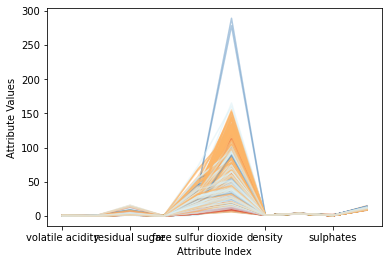

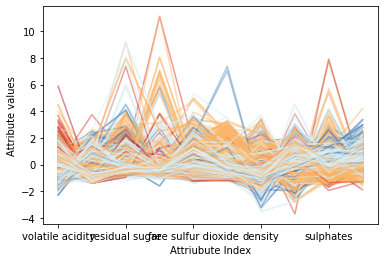

In [23]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
from math import exp

target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

wine = pd.read_csv(target_url, header=0, sep=";")

summary = wine.describe()
nrows = len(wine.index)
tasteCol=len(summary.columns)
meanTaste=summary.iloc[1, tasteCol - 1]
sdTaste=summary.iloc[2, tasteCol - 1]
nDataCol = len(wine.columns) - 1

for i in range(nrows):
  dataRow = wine.iloc[i, 1:nDataCol]
  normTarget = (wine.iloc[i, nDataCol] - meanTaste)/sdTaste
  labelColor = 1.0/(1.0 + exp(-normTarget))
  dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()
  #dataRow.plot()

wineNormalised = wine
ncols = len(wineNormalised.columns)

for i in range(ncols):
  mean = summary.iloc[1, i]
  sd = summary.iloc[2, i]
  wineNormalised.iloc[:, i:(i+1)] = (wineNormalised.iloc[:, i:(i+1)] - mean) / sd

for i in range(nrows):
  dataRow = wineNormalised.iloc[i, 1:nDataCol]
  normTarget = wineNormalised.iloc[i, nDataCol]
  labelColor = (1.0/(1.0 + exp(-normTarget)))
  dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
  #dataRow.plot()

plot.xlabel("Attriubute Index")
plot.ylabel(("Attribute values"))
plot.show()

